### CREDIT RISK MODELING: APPLICATION OF DEEP LEARNING

In [8]:
from collections import Counter

# EDA
import matplotlib.pyplot as plt
import numpy as np

# data manipulation
import pandas as pd
import seaborn as sns
from imblearn.combine import SMOTETomek
from scipy import stats

# feature selection
from sklearn.ensemble import RandomForestClassifier

# algorithms
from sklearn.linear_model import LogisticRegression

# model evaluation
from sklearn.metrics import (
    accuracy_score,
    brier_score_loss,
    classification_report,
    cohen_kappa_score,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
)

# machine learning
from sklearn.model_selection import train_test_split

**Introduction**

- The aim of this project is to use classical machine learning algorithms on a refined dataset and discuss the steps used to predict mortgage default. 

**1. Mortgage Delinquency**

There has been an evolution in the business of lending money as the process has become increasingly complex due to the growing market demands and clients' increasing appetite for credit. These factors among others have led to an increase in regulation and oversight in the banking industry so as to make sure they act responsibly when issuing loans. In the recent past, the rate of digitalization globally has shot up with people in remote parts of the world having access to phones. This has made it possible for people to use mobile devices as a financial medium through which they can send and receive money to and from other people around the world. These transactions happen in a matter of seconds. Many fintechs have taken advantage of this to launch microloans to customers who are low risk. The fintechs use the interaction of the customers with their gadgets to build a credit score for each of the customers and determine the probability of the customer defaulting on a loan. This logic also applies to mortgages and the probability of mortgage default is called mortgage delinquency. Machine learning models are trained on the data we have processed and the decision making process of giving loans is automated.

The machine learning models are used to assess the creditworthiness of a borrower. Before the advent of machine learning, lenders had an established guideline to measure creditworthiness. These guidelines were based on the five C's listed below:

1. Character that looks at the borrower's repayment and credit record.
2. Capacity that assess the borrower's ability to service the loan by looking at the debt-to-income ratio.
3. Capital that looks at the down payment the borrower has paid. This is used to determine how serious the borrower is.
4. Collateral, which is the asset provided to secure the mortgage, such as another home.
5. Conditions of the borrower's environment, like the state of the economy.

However, this has posed serious challenges to lenders as the number of features are limited in assessing customers' creditworthiness, with potentially credit-worthy clients being denied credit for failing certain criteria, and their inability to keep pace with the technological evolution that has been witnessed in the past decade.

It is because of these limitations that machine learning models are now at the heart of assessing the creditworthiness of borrowers. However, recent research has shown that deep learning has the potential to eclipse machine learning for assessing credit risks. Deep neural networks are great at detecting risky borrowers when the data is unstructured and very complex.

However, the risk of using deep learning models is that in most cases they are not explainable, that is, they are like black boxes and we are in most cases unable to know what happened for us to get a certain output. Currently, a lot of research is being done to address this by focusing on explainable artificial intelligence. In the next section, we are going to show a simple example of using a classical machine learning algorithm to assess credit risk. 

**2. Loading Data**

We skip the process of performing EDA as the data is already processed.
- Person Age, Person Income, Person Employment Length, Loan Amount, Loan interest rate, Loan percent income and Person credit history length were transformed using min max scaler, that is, converting the values to range between 0 and 1.
- The other columns were categorical and we therefore converted them to numerical data by one hot encoding the columns.

In [10]:
df = pd.read_csv("credit_sample.csv")
df.head()

,loan_status,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,0,0.015625,0.002751,0.121951,0.014493,0.321348,0.120482,0.000000,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
1,1,0.078125,0.002751,0.024390,0.144928,0.418539,0.686747,0.035714,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,1,0.046875,0.030209,0.097561,1.000000,0.551124,0.638554,0.000000,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,1,0.062500,0.024757,0.195122,1.000000,0.497191,0.662651,0.071429,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
4,1,0.015625,0.002898,0.048780,0.057971,0.096629,0.301205,0.000000,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0


In [11]:
df.shape

(29459, 27)

In [12]:
df.dtypes

loan_status                         int64
person_age                        float64
person_income                     float64
person_emp_length                 float64
loan_amnt                         float64
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
person_home_ownership_MORTGAGE      int64
person_home_ownership_OTHER         int64
person_home_ownership_OWN           int64
person_home_ownership_RENT          int64
loan_intent_DEBTCONSOLIDATION       int64
loan_intent_EDUCATION               int64
loan_intent_HOMEIMPROVEMENT         int64
loan_intent_MEDICAL                 int64
loan_intent_PERSONAL                int64
loan_intent_VENTURE                 int64
loan_grade_A                        int64
loan_grade_B                        int64
loan_grade_C                        int64
loan_grade_D                        int64
loan_grade_E                        int64
loan_grade_F                      

In [13]:
df.loan_status.value_counts()

loan_status
0    22996
1     6463
Name: count, dtype: int64

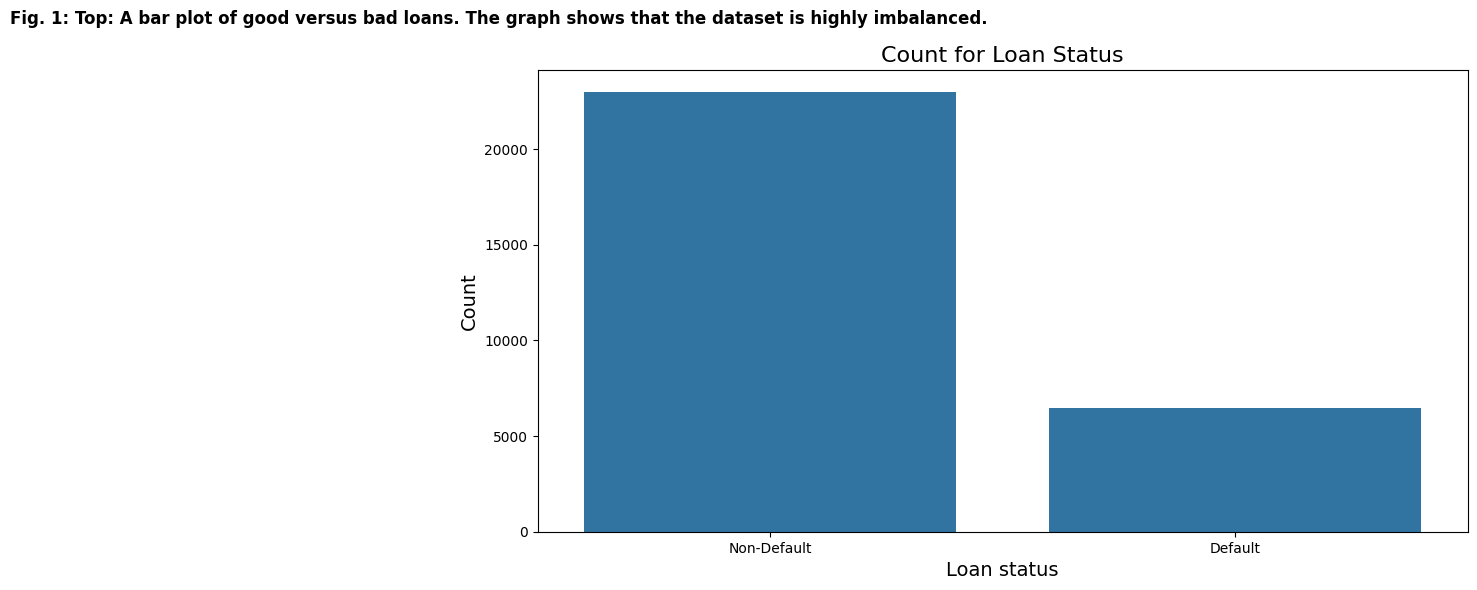

In [14]:
# plots count
ax = sns.countplot(x=df["loan_status"])

# sets the figure size in inches
ax.figure.set_size_inches(12, 6)

# set plot features
ax.set_title("Count for Loan Status", fontsize=16)
ax.set_ylabel("Count", fontsize=14)
ax.set_xlabel("Loan status", fontsize=14)

# set `xticks` labels
plt.xticks([0, 1], ["Non-Default", "Default"])

plt.suptitle(
    "Fig. 1: Top: A bar plot of good versus bad loans. The graph shows that the dataset is highly imbalanced.",
    fontweight="bold",
    horizontalalignment="right",
)

# displays plot
plt.show()